In [ ]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

# variable that contains the user credentials to access Twitter API
access_token = "1558940846-zetaPhMq3cDzkK8xdXvod9S45ERxeVwKZpkf88s
access_token_secret = "lxuvDHcfAMhafVuOPVsF1m33b0rCeSWfVBGHEgzwzRVSe"
consumer_key = "3ncfCFtuHiQzZRvIgIH6YYNTU"
consumer_secret = "VboOTxKdmsscZ6gIL8hOXfeHbcsW8Qg21YIIRyD5eCeDgCitDc"

# this is the basic listener that just prints received tweets to stdout
class StdOutListener(StreamListener):
    def on_data(self, data):
        #print ("%s\n" % data)
        #return True
        with open("DTCRW.txt", "a") as tweet_log:
            tweet_log.write(data)
            
    def on_error(self, status):
        print (status)


l = StdOutListener()
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
stream = Stream(auth, l)


stream.filter(locations=[106.20, -6.41, 107.19, -6.01])



Diatas merupakan code untuk crawling data twitter yang berlokasi pada koordinat (106.20, -6.41, 107.19, -6.01) , dengan API sebagai berikut :

   access_token = "1558940846-zetaPhMq3cDzkK8xdXvod9S45ERxeVwKZpkf88s"
   
   access_token_secret = "lxuvDHcfAMhafVuOPVsF1m33b0rCeSWfVBGHEgzwzRVSe"
   
   consumer_key = "3ncfCFtuHiQzZRvIgIH6YYNTU"
   
   consumer_secret = "VboOTxKdmsscZ6gIL8hOXfeHbcsW8Qg21YIIRyD5eCeDgCitDc"
   
kemudian hasil tweet disimpan pada file DTCRW.txt


In [5]:
import json
#membaca data dalam format json
tweets_data = []
tweets_file = open('DTCRW.txt', "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
            
import pandas as pd

tweets = pd.DataFrame()
tweets['text'] = list(map(lambda tweet:
tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet:
tweet['lang'], tweets_data))
tweets['created_at'] = list(map(lambda tweet:
tweet['created_at'], tweets_data))
tweets['country'] = list(map(lambda tweet:
tweet['place']['country'] if 
tweet ['place'] != None else None, tweets_data))
    
print("jumlah data tweets :", len(tweets))

jumlah data tweets : 74271


In [6]:
tweetsIn = tweets[tweets.lang == 'in'] #mengambil tweet yang berbahasa indonesia 

In [7]:
tweetsIn.head() #menampilkan 5 data pertama dari tweet berbahasa indonesia 

,text,lang,created_at,country
0,Saya Masih Cinta Sama Yuni...........makinnnn ...,in,Sat Mar 17 16:21:05 +0000 2018,Indonesia
1,Guci Trip 🏞️ @ Wisata Guci Tegal https://t.co/...,in,Sat Mar 17 16:21:13 +0000 2018,Indonesia
2,@PRAmeliaa @shitlicious Adanya cuma hati saya ...,in,Sat Mar 17 16:21:21 +0000 2018,Indonesia
3,Kalo gue sangat suka bs ada di stasiun Jurangm...,in,Sat Mar 17 16:21:32 +0000 2018,Indonesia
4,Yusril Ihza Mahendra https://t.co/2gB8af9vHc,in,Sat Mar 17 16:21:33 +0000 2018,Indonesia


In [8]:
print ("Jumlah data tweetsIn :", len(tweetsIn)) #menampilkan banyaknya tweet berbahasa indonesia

Jumlah data tweetsIn : 51940


In [9]:
tweetsIn['created_at']=pd.to_datetime(tweetsIn['created_at'], utc=True) #merubah format kolom "created at" menjadi datetime

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
tweetsIn.index = tweetsIn.created_at #mengindex kolom created_at
tweetsIn.head() #menampilkan hasil perubahan yang telah dilakukan

,text,lang,created_at,country
created_at,,,,
2018-03-17 16:21:05+00:00,Saya Masih Cinta Sama Yuni...........makinnnn ...,in,2018-03-17 16:21:05+00:00,Indonesia
2018-03-17 16:21:13+00:00,Guci Trip 🏞️ @ Wisata Guci Tegal https://t.co/...,in,2018-03-17 16:21:13+00:00,Indonesia
2018-03-17 16:21:21+00:00,@PRAmeliaa @shitlicious Adanya cuma hati saya ...,in,2018-03-17 16:21:21+00:00,Indonesia
2018-03-17 16:21:32+00:00,Kalo gue sangat suka bs ada di stasiun Jurangm...,in,2018-03-17 16:21:32+00:00,Indonesia
2018-03-17 16:21:33+00:00,Yusril Ihza Mahendra https://t.co/2gB8af9vHc,in,2018-03-17 16:21:33+00:00,Indonesia


Terlihat perubahan pada out[10] format created_at berubah menjadi format datetime

In [11]:
#melakukan perubahan zona waktu dimana format awal hasil crawling data twitter merupakan UTC
#kita akan merubahnya menjadi format waktu jakarta
import pytz
from datetime import datetime
from pytz import timezone

JKT = pytz.timezone('Asia/Jakarta')
tweetsIn.index = tweetsIn.index.tz_convert(JKT)

In [12]:
tweetsIn.head() #menampilkan hasil perubahan terhadap zona waktu

,text,lang,created_at,country
created_at,,,,
2018-03-17 23:21:05+07:00,Saya Masih Cinta Sama Yuni...........makinnnn ...,in,2018-03-17 16:21:05+00:00,Indonesia
2018-03-17 23:21:13+07:00,Guci Trip 🏞️ @ Wisata Guci Tegal https://t.co/...,in,2018-03-17 16:21:13+00:00,Indonesia
2018-03-17 23:21:21+07:00,@PRAmeliaa @shitlicious Adanya cuma hati saya ...,in,2018-03-17 16:21:21+00:00,Indonesia
2018-03-17 23:21:32+07:00,Kalo gue sangat suka bs ada di stasiun Jurangm...,in,2018-03-17 16:21:32+00:00,Indonesia
2018-03-17 23:21:33+07:00,Yusril Ihza Mahendra https://t.co/2gB8af9vHc,in,2018-03-17 16:21:33+00:00,Indonesia


Terlihat pada out[12] zona waktu telah berubah semula format UTC (+00:00) menjadi jakarta (+07:00)

In [14]:
#mengambil data tweet selama 3 hari dari hasil crawling yaitu  pada tanggal 18,20, dan 27 Maret 2018
tweetsIn18 = tweetsIn.loc['20180318']
tweetsIn20 = tweetsIn.loc['20180320']
tweetsIn27 = tweetsIn.loc['20180327']

In [15]:
tweetsIn18.head() #menampilkan 5 data pertama pada tanggal 18 Maret 2018

,text,lang,created_at,country
created_at,,,,
2018-03-18 00:00:01+07:00,Open BO &amp; Members ●▶▶▶ @aphroditejkt ◀◀◀●...,in,2018-03-17 17:00:01+00:00,Indonesia
2018-03-18 00:00:06+07:00,Ngapa jd dia-___- https://t.co/oMwrCZIDDR,in,2018-03-17 17:00:06+00:00,Indonesia
2018-03-18 00:00:06+07:00,Kepercayaan itu berharga...,in,2018-03-17 17:00:06+00:00,Indonesia
2018-03-18 00:00:10+07:00,@aciel godaan lapar terberat itu emank jam seg...,in,2018-03-17 17:00:10+00:00,Indonesia
2018-03-18 00:00:14+07:00,haahaha kasian bgt jd ky gini. yg ky gitu aj...,in,2018-03-17 17:00:14+00:00,Indonesia


In [16]:
tweetsIn20.head() #menampilkan 5 data pertama pada tanggal 20 Maret 2018

,text,lang,created_at,country
created_at,,,,
2018-03-20 00:00:21+07:00,@gabyJKT48 abis latihan mau lanjut nugas apa g...,in,2018-03-19 17:00:21+00:00,Indonesia
2018-03-20 00:00:57+07:00,@CakRembo kl Mata gue masih setuju. Blind Herr...,in,2018-03-19 17:00:57+00:00,Indonesia
2018-03-20 00:00:57+07:00,@BangHas1705 @DPP_LPI @prabowo setuju,in,2018-03-19 17:00:57+00:00,Indonesia
2018-03-20 00:00:58+07:00,keren mono rell jakarta \n\ntahun 2150 kemudia...,in,2018-03-19 17:00:58+00:00,Indonesia
2018-03-20 00:01:17+07:00,Selamat tidur kak irin. https://t.co/9Yljbb4Fzz,in,2018-03-19 17:01:17+00:00,Indonesia


In [18]:
tweetsIn27.head() #menampilkan 5 data pertama pada tanggal 27 Maret 2018

,text,lang,created_at,country
created_at,,,,
2018-03-27 00:00:04+07:00,"Lo pada udah nyolek nyokap gua, tiati aja cuy :)",in,2018-03-26 17:00:04+00:00,Indonesia
2018-03-27 00:00:08+07:00,@nietzsche_b_f_ Itu teori dari anak desain soa...,in,2018-03-26 17:00:08+00:00,Indonesia
2018-03-27 00:00:13+07:00,Follow back ka@Anggun76210795,in,2018-03-26 17:00:13+00:00,Indonesia
2018-03-27 00:00:39+07:00,Sempat terharu @joanidol9 hibur kembali Indone...,in,2018-03-26 17:00:39+00:00,Indonesia
2018-03-27 00:00:41+07:00,untung ada tekkeb ya kalo kagak udh mati kali ...,in,2018-03-26 17:00:41+00:00,Indonesia


In [19]:
#mngeluarkan banyaknya tweet pada setiap tanggal yang telah ditentukan
print ("jumlah data tweetsIn18 :", len(tweetsIn18))
print ("jumlah data tweetsIn20 :", len(tweetsIn20))
print ("jumlah data tweetsIn27 :", len(tweetsIn27))

#mengindex kolom pada setiap tanggal dengan jumlah tweetnya dan melabelinya untuk dijadikan diagram
df = pd.DataFrame({'tanggal' : ['18 Maret 2018','20 Maret 2018','27 Maret 2018'],
                   'jumlah tweets' : [len(tweetsIn18),len(tweetsIn20),len(tweetsIn27)]})

jumlah data tweetsIn18 : 11526
jumlah data tweetsIn20 : 12345
jumlah data tweetsIn27 : 12089


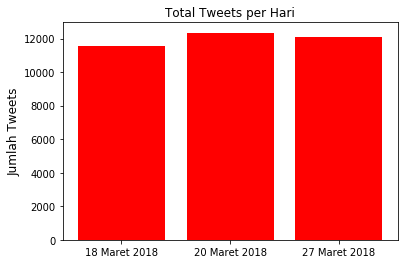

In [39]:
#Memplot jumlah data tweet perhari
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x_pos = list(range(len(df)))
width = 0.8
plt.bar(x_pos, df['jumlah tweets'], width, alpha=1, color='r')
ax.set_ylabel('Jumlah Tweets', fontsize=12)
ax.set_title('Total Tweets per Hari', fontsize=12)
ax.set_xticks([p + 0.001*width for p in x_pos])
ax.set_xticklabels(df['tanggal'])
plt.show()

Terlhat pada diagram diatas, jumlah tweet perhari tidak berbeda jauh walaupun,
pada hari Minggu 18 Maret 2018 jumlah tweet yang terkumpul paling sedikit dibandingkan 
pada Hari Selasa,20 Maret 2018 dan 27 Maret 2018 

In [40]:
#Import modul yang dibutuhkan untuk membuat diagram berdsarkan jam per hari
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import*
get_ipython().magic('matplotlib inline')
plt.rcParams['figure.figsize'] = (15, 5)

In [41]:
from pandas import Series
def f(x):
     return Series(dict(Number_of_tweets = x['text'].count()))

#Mendefinisikan Tweet perjam berdasarkan tanggal 18 Maret 2018 dan mencetak tabel jumlah tweet perjamnya
hourly_count18 = tweetsIn18.groupby(tweetsIn18.index.hour).apply(f)
print ("data selama %d jam pada tanggal 18 Maret 2018" % len(hourly_count18))
hourly_count18

data selama 24 jam pada tanggal 18 Maret 2018


,Number_of_tweets
created_at,
0,487
1,309
2,172
3,72
4,101
5,142
6,292
7,372
8,472


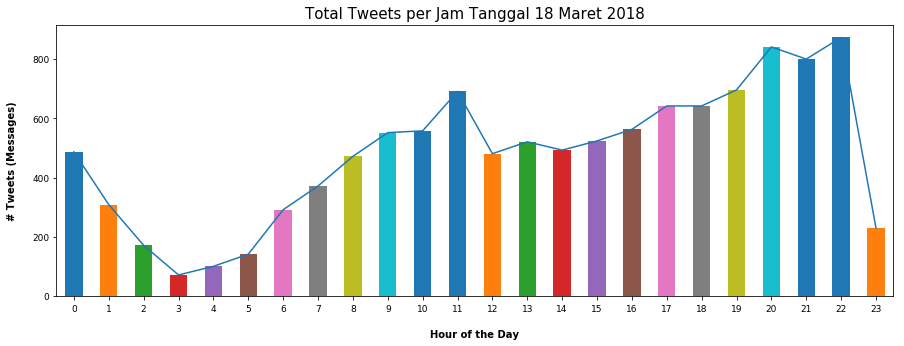

In [42]:
#Memubuat plot garis
hourly_plot18 = hourly_count18['Number_of_tweets'].plot(kind='line')
hours = list(range(0,24))
xticks(np.arange(24), hours, rotation = 0,fontsize = 9)
hourly_plot18.set_title('Total Tweets per Jam Tanggal 18 Maret 2018', fontsize=15)
hourly_plot18.set_xlabel('Jam', weight='bold', labelpad=15)
hourly_plot18.set_ylabel('Jumlah Tweets', weight='bold', labelpad=15)
xticks(fontsize = 9, rotation = 0, ha= "center")
yticks(fontsize = 9)
hourly_plot18.tick_params(axis='x', pad=5)

#Membuat Plot Bar
hourly_plot18 = hourly_count18['Number_of_tweets'].plot(kind='bar')
hours = list(range(0,24))                                                 
xticks(np.arange(24), hours, rotation = 0,fontsize = 9)                   

hourly_plot18.set_title('Total Tweets per Jam Tanggal 18 Maret 2018', fontsize=15)
hourly_plot18.set_xlabel('Hour of the Day', weight='bold', labelpad=15)     
hourly_plot18.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) 

xticks(fontsize = 9, rotation = 0, ha= "center")                          
yticks(fontsize = 9)                                                      
hourly_plot18.tick_params(axis='x', pad=5)

#Akan menghasilkan Histogram jumlah tweet pada tanggal 18 Maret 2018 perjam

Dari histogram Total Tweets per Jam tanggal 18 Maret 2018 dari pukul 00:00 hingga 03:00 terlihat adanya penurunan jumlah tweet per jam hal ini kemungkinan dikarenankan pada jam tersebut banyak orang yang sudah tertidur kemudian dari pukul 03:00 hingga 22:00 jumlah tweet per jam nya naik walaupun dijam jam tertentu turun secara tidak signifikan ,hal ini terjadi karena pada jam tersebut orang-orang mulai beraktifitas kembali untuk melakukan kegiatan sehari-hari , dan setelah pukul 22:00 dan seterusnya terlihat penurunan jumlah tweet karena pada waktu ini banyak orang yang beristirahat setelah beraktifitas seharian.

In [43]:
from pandas import Series
def f(x):
     return Series(dict(Number_of_tweets = x['text'].count()))

#Mendefinisikan Tweet perjam berdasarkan tanggal 20 Maret 2018 dan mencetak tabel jumlah tweet perjamnya
hourly_count20 = tweetsIn20.groupby(tweetsIn20.index.hour).apply(f)
print ("data selama %d jam pada tanggal 20 Maret 2018" % len(hourly_count20))
hourly_count20

data selama 24 jam pada tanggal 20 Maret 2018


,Number_of_tweets
created_at,
0,365
1,240
2,147
3,109
4,89
5,186
6,354
7,436
8,558


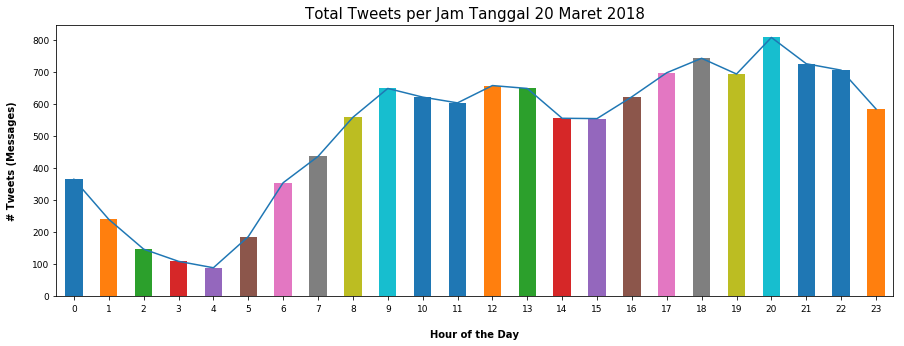

In [45]:
#Memubuat plot garis
hourly_plot20 = hourly_count20['Number_of_tweets'].plot(kind='line')
hours = list(range(0,24))
xticks(np.arange(24), hours, rotation = 0,fontsize = 9)
hourly_plot20.set_title('Total Tweets per Jam Tanggal 20 Maret 2018', fontsize=15)
hourly_plot20.set_xlabel('Jam', weight='bold', labelpad=15)
hourly_plot20.set_ylabel('Jumlah Tweets', weight='bold', labelpad=15)
xticks(fontsize = 9, rotation = 0, ha= "center")
yticks(fontsize = 9)
hourly_plot20.tick_params(axis='x', pad=5)

#Membuat Plot Bar
hourly_plot20 = hourly_count20['Number_of_tweets'].plot(kind='bar')
hours = list(range(0,24))                                                 
xticks(np.arange(24), hours, rotation = 0,fontsize = 9)                   

hourly_plot20.set_title('Total Tweets per Jam Tanggal 20 Maret 2018', fontsize=15)
hourly_plot20.set_xlabel('Hour of the Day', weight='bold', labelpad=15)     
hourly_plot20.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) 

xticks(fontsize = 9, rotation = 0, ha= "center")                          
yticks(fontsize = 9)                                                      
hourly_plot20.tick_params(axis='x', pad=5)

#Akan menghasilkan Histogram jumlah tweet pada tanggal 20 Maret 2018 perjam

Dari histogram Total Tweets per Jam tanggal 20 Maret 2018 terlihat dari pukul 00:00 hingga 04:00 terlihat adanya penurunan jumlah tweet per jam hal ini kemungkinan dikarenankan pada jam tersebut banyak orang yang sudah tertidur kemudian dari pukul 04:00 hingga 20:00 jumlah tweet per jam nya naik walaupun dijam jam tertentu turun secara tidak signifikan ,hal ini terjadi karena pada jam tersebut orang-orang mulai beraktifitas kembali untuk melakukan kegiatan sehari-hari , dan setelah pukul 20:00 dan seterusnya terlihat penurunan jumlah tweet karena pada waktu ini banyak orang yang beristirahat setelah beraktifitas seharian.


In [46]:
from pandas import Series
def f(x):
     return Series(dict(Number_of_tweets = x['text'].count()))

#Mendefinisikan Tweet perjam berdasarkan tanggal 27 Maret 2018 dan mencetak tabel jumlah tweet perjamnya
hourly_count27 = tweetsIn27.groupby(tweetsIn27.index.hour).apply(f)
print ("data selama %d jam pada tanggal 27 Maret 2018" % len(hourly_count27))
hourly_count27

data selama 24 jam pada tanggal 27 Maret 2018


,Number_of_tweets
created_at,
0,356
1,219
2,111
3,92
4,97
5,207
6,406
7,510
8,582


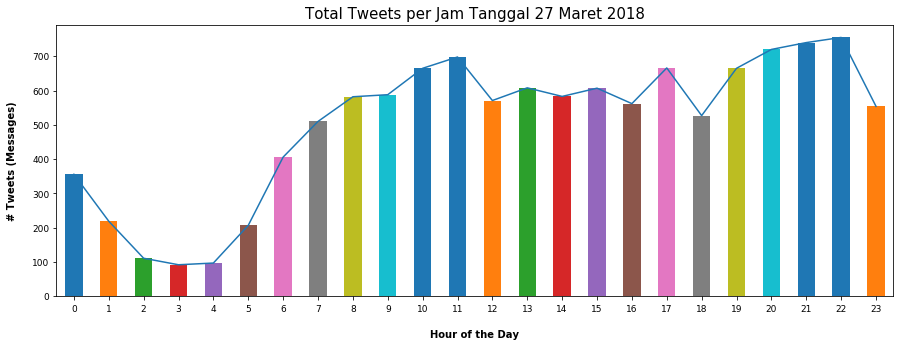

In [47]:
#Memubuat plot garis
hourly_plot27 = hourly_count27['Number_of_tweets'].plot(kind='line')
hours = list(range(0,24))
xticks(np.arange(24), hours, rotation = 0,fontsize = 9)
hourly_plot27.set_title('Total Tweets per Jam Tanggal 27 Maret 2018', fontsize=15)
hourly_plot27.set_xlabel('Jam', weight='bold', labelpad=15)
hourly_plot27.set_ylabel('Jumlah Tweets', weight='bold', labelpad=15)
xticks(fontsize = 9, rotation = 0, ha= "center")
yticks(fontsize = 9)
hourly_plot27.tick_params(axis='x', pad=5)

#Membuat Plot Bar
hourly_plot27 = hourly_count27['Number_of_tweets'].plot(kind='bar')
hours = list(range(0,24))                                                 
xticks(np.arange(24), hours, rotation = 0,fontsize = 9)                   

hourly_plot27.set_title('Total Tweets per Jam Tanggal 27 Maret 2018', fontsize=15)
hourly_plot27.set_xlabel('Hour of the Day', weight='bold', labelpad=15)     
hourly_plot27.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) 

xticks(fontsize = 9, rotation = 0, ha= "center")                          
yticks(fontsize = 9)                                                      
hourly_plot27.tick_params(axis='x', pad=5)

#Akan menghasilkan Histogram jumlah tweet pada tanggal 27 Maret 2018 perjam

Dari histogram Total Tweets per Jam tanggal 27 Maret 2018 terlihat dari pukul 00:00 hingga 04:00 terlihat adanya penurunan jumlah tweet per jam hal ini kemungkinan dikarenankan pada jam tersebut banyak orang yang sudah tertidur kemudian dari pukul 04:00 hingga 22:00 jumlah tweet per jam nya naik walaupun dijam jam tertentu turun secara tidak signifikan ,hal ini terjadi karena pada jam tersebut orang-orang mulai beraktifitas kembali untuk melakukan kegiatan sehari-hari , dan setelah pukul 22:00 dan seterusnya terlihat penurunan jumlah tweet karena pada waktu ini banyak orang yang beristirahat setelah beraktifitas seharian.

Kesimpulan :
    Berdasarkan histogram total tweet perhari pada tanggal 18,20 dan 27 Maret 2018 banyak tweet tidak terlalu berbeda jauh pada setiap harinya,dimana pada tanggal 18 Maret 2018 memiliki jumlah tweet terendah sedangkan 20 Maret 2018 tertinggi.
    Berdasarkan histogram total tweet perjam pada tiap hari terlihat pada waktu 00:00-04:00 terjadi penurunan jumlah tweet yang dapat disimpulkan pada waktu ini kebanyakan orang sudah tertidur ,lalu dari pukul 04:00 hingga 22:00 dominan jumlah tweet mengalami kenaikan serta mencapai maksimum sekitar jam 20:00 sampai 22:00 dimana aktifitas tweet paling tinggi disekitaran jam tersebut, dan setelahnya mengalami penurunan yang dikarenakan orang orang mulai berhenti tweets untuk beristirahat .